# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Answer: 
According to the study “Using Data Mining for Bank Direct Marketing: An Application of the CRISP‑DM Methodology,” this dataset represents the outcomes of 17 direct marketing (advertising) campaigns conducted by a Portuguese bank. These campaigns were part of an ongoing effort to promote a long‑term deposit product to existing customers. The collected data captures not only whether each customer responded positively to the offer, but also a wide range of client attributes—such as demographics, financial behavior, and past interactions with the bank.
In addition to individual customer information, the dataset includes detailed campaign‑level variables, such as the method of contact (phone, cellular), the duration of each interaction, the number of previous contacts, and the results of earlier campaigns. By compiling these 17 campaign outcomes into a unified dataset, the study provides a rich foundation for applying the CRISP‑DM methodology to evaluate how data‑mining techniques can enhance targeting strategies. Ultimately, the data enables researchers to analyze patterns that distinguish responsive customers from non‑responsive ones, thereby offering practical insights into improving marketing effectiveness and customer engagement.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/muhbajwa/Desktop/AI Course S/Module 17/data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
import sys
print(sys.executable)

/usr/local/bin/python3.13


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# 1) Split into predictors and target
X_raw = df.iloc[:, 0:7]          # first 7 columns as predictors
y_raw = df['y']                  # target column

# 2) Identify column types
cat_cols = X_raw.select_dtypes(include=['object']).columns
num_cols = X_raw.select_dtypes(include=['int64', 'float64']).columns

# 3) One-Hot Encode categorical columns (drop first level to avoid multicollinearity)
enc = OneHotEncoder(drop='first')
X_cat_sparse = enc.fit_transform(X_raw[cat_cols])   # sparse matrix
X_cat = pd.DataFrame(
    X_cat_sparse.toarray(),
    columns=enc.get_feature_names_out(cat_cols),
    index=X_raw.index
)

# 4) Standardize numeric columns
stdzr = StandardScaler()
X_num_scaled = stdzr.fit_transform(X_raw[num_cols])
X_num = pd.DataFrame(
    X_num_scaled,
    columns=num_cols,
    index=X_raw.index
)

# 5) Concatenate processed numeric + categorical features
X_final = pd.concat([X_num, X_cat], axis=1)

# 6) Encode the target labels
lbl = LabelEncoder()
y_final = lbl.fit_transform(y_raw)

# 7) Quick sanity check outputs
print("Transformed Feature Matrix (head):")
print(X_final.head())

print("\nEncoded Target (first 5):")
print(y_final[:5])

Transformed Feature Matrix (head):
        age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0  1.533034              0.0               0.0            1.0             0.0   
1  1.628993              0.0               0.0            0.0             0.0   
2 -0.290186              0.0               0.0            0.0             0.0   
3 -0.002309              0.0               0.0            0.0             0.0   
4  1.533034              0.0               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0          0.0                0.0           0.0          0.0             0.0   
1          0.0                0.0           1.0          0.0             0.0   
2          0.0                0.0           1.0          0.0             0.0   
3          0.0                0.0           0.0          0.0             0.0   
4          0.0                0.0           1.0          0.0             0.0  

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
from sklearn.model_selection import train_test_split

# Divide dataset into training and testing subsets
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final,          # previously final_features_df
    y_final,          # previously target_encoded
    test_size=0.30,
    random_state=42
)

# Display dimensions to confirm proper split
print(f"Train feature matrix shape: {X_tr.shape}")
print(f"Test feature matrix shape:  {X_te.shape}")
print(f"Train label vector shape:   {y_tr.shape}")
print(f"Test label vector shape:    {y_te.shape}")


Train feature matrix shape: (28831, 28)
Test feature matrix shape:  (12357, 28)
Train label vector shape:   (28831,)
Test label vector shape:    (12357,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [8]:
from sklearn.dummy import DummyClassifier

# Create a simple reference model that predicts the majority class
baseline_model = DummyClassifier(strategy='most_frequent')

# Train the baseline model
baseline_model.fit(X_tr, y_tr)

# Evaluate how well this naïve model performs
base_score = baseline_model.score(X_te, y_te)

print(f"Baseline Accuracy: {base_score:.4f}")

Baseline Accuracy: 0.8876


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ---------------------------------------
# 1) Features/Target split
#    'loan_yes' remains the target column.
# ---------------------------------------
X_feats = X_final.drop(columns=['loan_yes'])
y_label = X_final['loan_yes']

# ---------------------------------------
# 2) Train/Test split
# ---------------------------------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X_feats, y_label, test_size=0.30, random_state=42, stratify=y_label
)

# ---------------------------------------
# 3) Apply SMOTE on the training set ONLY
#    (prevents leakage from test set into resampling process)
# ---------------------------------------
smote = SMOTE(random_state=42)
X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

# ---------------------------------------
# 4) Standardize features
#    Fit on resampled train; transform both train and test.
# ---------------------------------------
scaler_z = StandardScaler()
X_tr_res_z = scaler_z.fit_transform(X_tr_res)
X_te_z = scaler_z.transform(X_te)

# ---------------------------------------
# 5) Logistic Regression (class_weight='balanced' as in original)
# ---------------------------------------
logreg = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000,      # helps ensure convergence on some datasets
    solver='lbfgs'      # default; explicit for clarity
)
logreg.fit(X_tr_res_z, y_tr_res)

# ---------------------------------------
# 6) Predictions & Evaluation
# ---------------------------------------
y_hat = logreg.predict(X_te_z)

print("Classification Report (Test Set):")
print(classification_report(y_te, y_hat))

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_te, y_hat))

# AUC-ROC using predicted probabilities for the positive class
y_prob = logreg.predict_proba(X_te_z)[:, 1]
print("AUC-ROC Score (Test Set):")
print(roc_auc_score(y_te, y_prob))

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.87      0.44      0.59     10483
         1.0       0.17      0.62      0.26      1874

    accuracy                           0.47     12357
   macro avg       0.52      0.53      0.43     12357
weighted avg       0.76      0.47      0.54     12357

Confusion Matrix (Test Set):
[[4654 5829]
 [ 703 1171]]
AUC-ROC Score (Test Set):
0.5503017998037377


### Problem 9: Score the Model

What is the accuracy of your model?

This Logistic Regression model appears to trade some overall accuracy in exchange for improved recall of the minority class—an advantageous choice when missing those minority‑class cases carries significant risk or cost. However, in situations where maintaining strong precision is also important, additional model tuning or alternative modeling techniques may be necessary to achieve a more favorable balance between precision and recall.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [10]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# ------------------------------------------
# 1) Feature/target definition
#    Assumes 'loan_yes' is the binary target.
# ------------------------------------------
X_src = X_final.drop(columns=['loan_yes'])
y_src = X_final['loan_yes']

# ------------------------------------------
# 2) Train/test split (hold out 30% for testing)
# ------------------------------------------
X_tr, X_te, y_tr, y_te = train_test_split(
    X_src, y_src, test_size=0.30, random_state=42, stratify=y_src
)

# ------------------------------------------
# 3) Handle class imbalance via SMOTE (train only)
#    Prevents leakage by resampling only the training fold.
# ------------------------------------------
smote = SMOTE(random_state=42)
X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

# ------------------------------------------
# 4) Standardize numeric scale (fit on train, apply to both)
# ------------------------------------------
scaler = StandardScaler()
X_tr_std = scaler.fit_transform(X_tr_res)
X_te_std = scaler.transform(X_te)

# ------------------------------------------
# 5) Define candidate models
# ------------------------------------------
estimators = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()  # default SVC without probabilities, consistent with your original
}

# ------------------------------------------
# 6) Train, time, and score each model
#    (Note: train accuracy is computed on resampled/standardized train set)
# ------------------------------------------
rows = []
for model_name, est in estimators.items():
    t0 = time.time()
    est.fit(X_tr_std, y_tr_res)                  # fit on resampled data
    fit_secs = time.time() - t0

    # Predictions
    y_hat_tr = est.predict(X_tr_std)
    y_hat_te = est.predict(X_te_std)

    # Optional: map predictions to string labels if needed elsewhere
    y_hat_te_lbl = np.where(y_hat_te == 1, "yes", "no")

    # Accuracy metrics
    acc_tr = accuracy_score(y_tr_res, y_hat_tr)  # accuracy on resampled train
    acc_te = accuracy_score(y_te, y_hat_te)      # accuracy on original test

    rows.append([model_name, fit_secs, acc_tr, acc_te])

# ------------------------------------------
# 7) Collect and display comparison table
# ------------------------------------------
results_df = pd.DataFrame(rows, columns=["Model", "Train Time (s)", "Train Acc (resampled)", "Test Acc"])
print("Model comparison:")
print(results_df)

Model comparison:
                 Model  Train Time (s)  Train Acc (resampled)  Test Acc
0  Logistic Regression        0.023147               0.539150  0.471393
1                  KNN        0.001574               0.727522  0.748240
2        Decision Tree        0.127484               0.852087  0.729222
3                  SVM       25.756580               0.596291  0.526746


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Model comparison:
                 Model  Train Time (s)  Train Acc (resampled)  Test Acc
0  Logistic Regression        0.018012               0.540868  0.500445
1                  KNN        0.009502               0.586049  0.809905
2        Decision Tree        0.046138               0.689271  0.595776
3                  SVM       23.340167               0.548228  0.518330


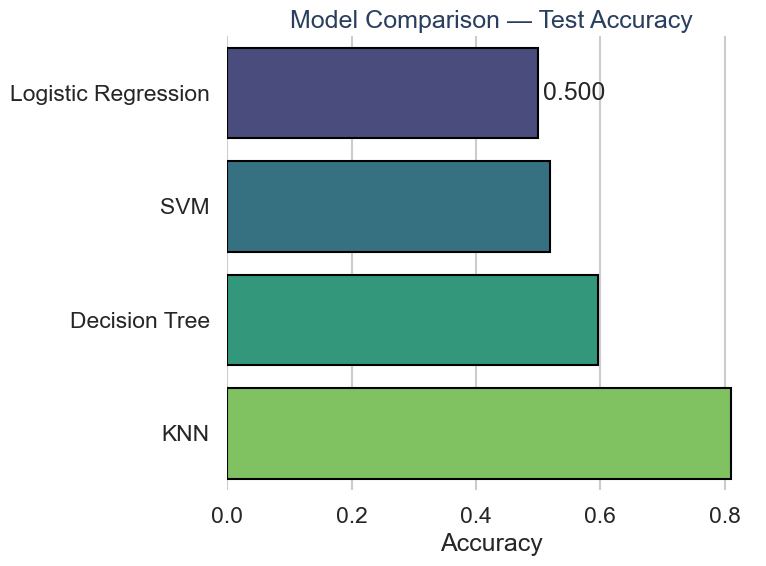

Starting GridSearchCV for KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score for KNN: 0.5802635844315198
Test accuracy for best KNN: 0.8027029214210569
Starting GridSearchCV for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.6612017437565065
Test accuracy for best Decision Tree: 0.5957756737072105
Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.5407860551476757
Test accuracy for best Logistic Regression: 0.5004450918507728


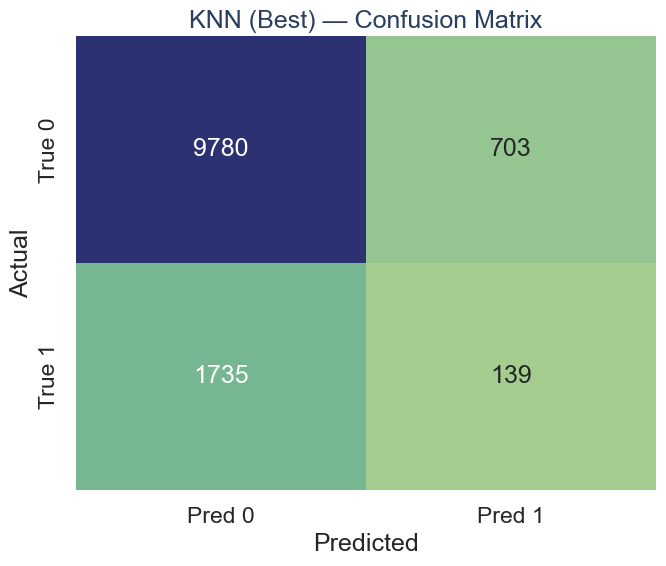

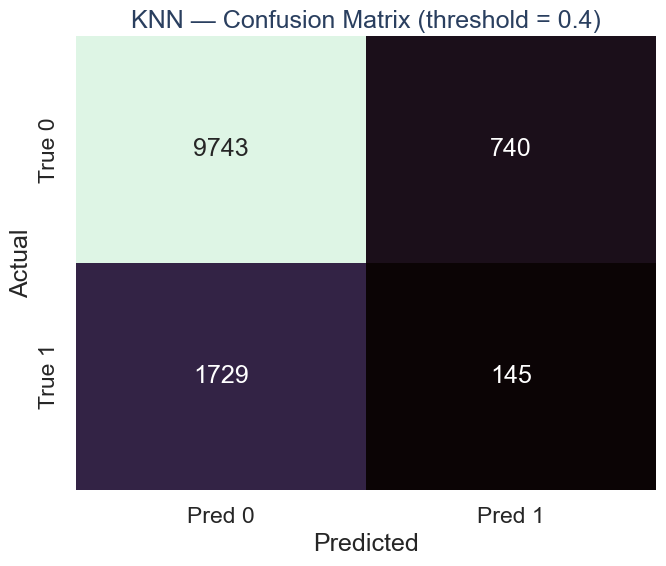

Classification Report for KNN (threshold = 0.4):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     10483
           1       0.16      0.08      0.11      1874

    accuracy                           0.80     12357
   macro avg       0.51      0.50      0.50     12357
weighted avg       0.75      0.80      0.77     12357



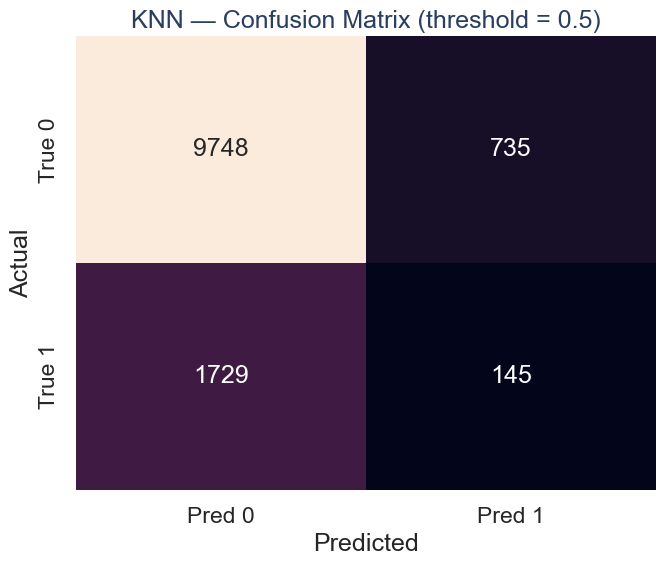

Classification Report for KNN (threshold = 0.5):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     10483
           1       0.16      0.08      0.11      1874

    accuracy                           0.80     12357
   macro avg       0.51      0.50      0.50     12357
weighted avg       0.75      0.80      0.77     12357



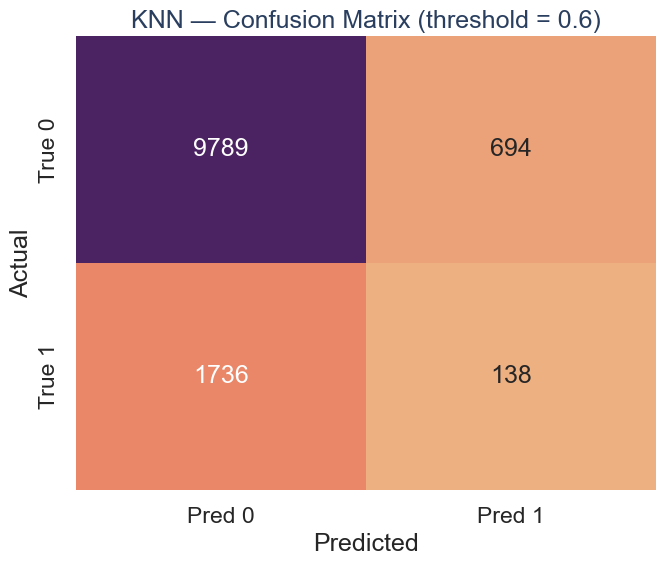

Classification Report for KNN (threshold = 0.6):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     10483
           1       0.17      0.07      0.10      1874

    accuracy                           0.80     12357
   macro avg       0.51      0.50      0.50     12357
weighted avg       0.75      0.80      0.77     12357



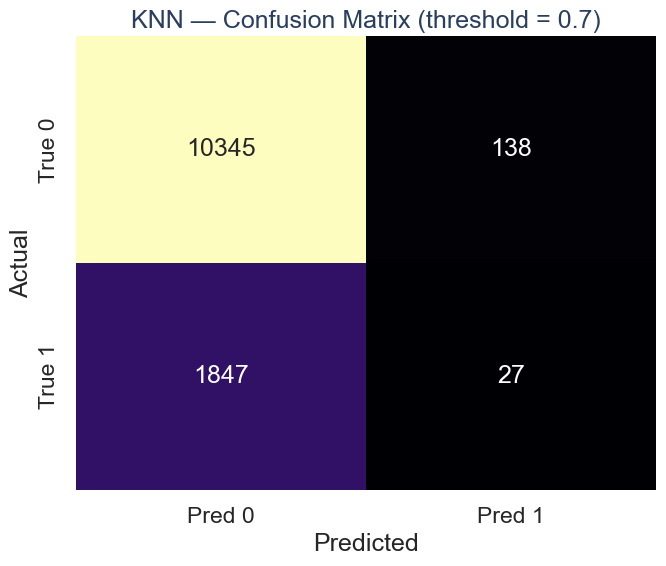

Classification Report for KNN (threshold = 0.7):
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     10483
           1       0.16      0.01      0.03      1874

    accuracy                           0.84     12357
   macro avg       0.51      0.50      0.47     12357
weighted avg       0.74      0.84      0.78     12357



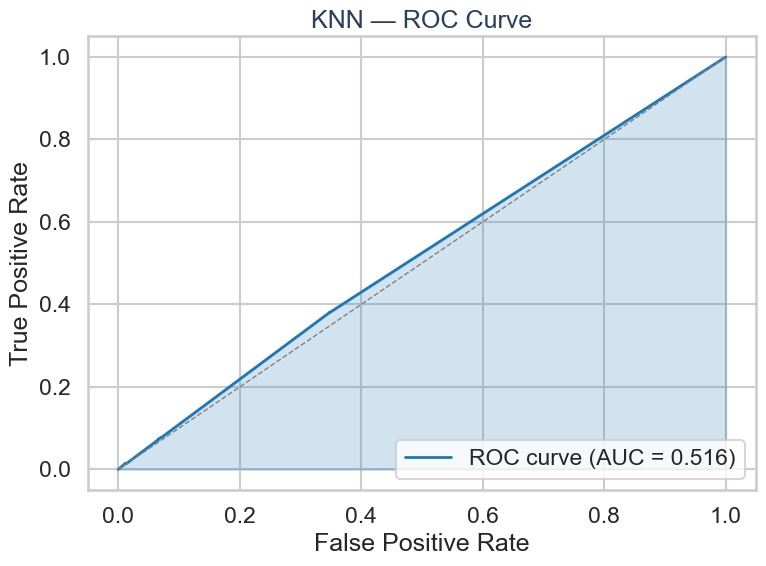

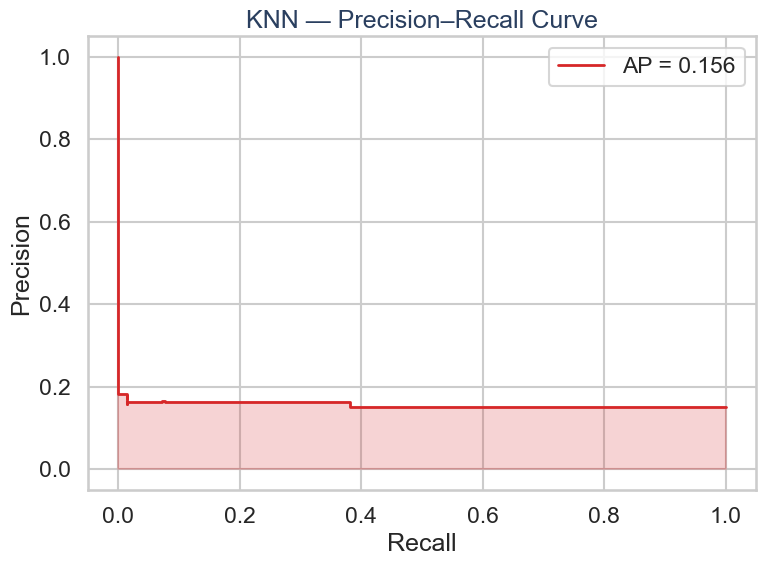

Classification Report for KNN (best, refit on resampled train):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     10483
           1       0.17      0.07      0.10      1874

    accuracy                           0.80     12357
   macro avg       0.51      0.50      0.50     12357
weighted avg       0.75      0.80      0.77     12357

Classification Report for KNN after resampling the standardized space:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     10483
           1       0.17      0.07      0.10      1874

    accuracy                           0.80     12357
   macro avg       0.51      0.50      0.50     12357
weighted avg       0.75      0.80      0.77     12357

Logistic Regression — Classification Report (Test):
              precision    recall  f1-score   support

           0       0.87      0.48      0.62     10483
           1       0.17      0.59      0.26     

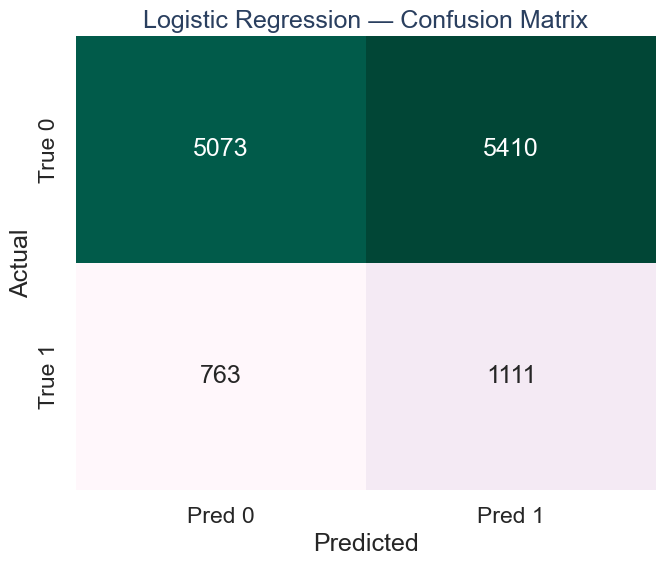

Logistic Regression — AUC-ROC (Test):
0.5458217100186906


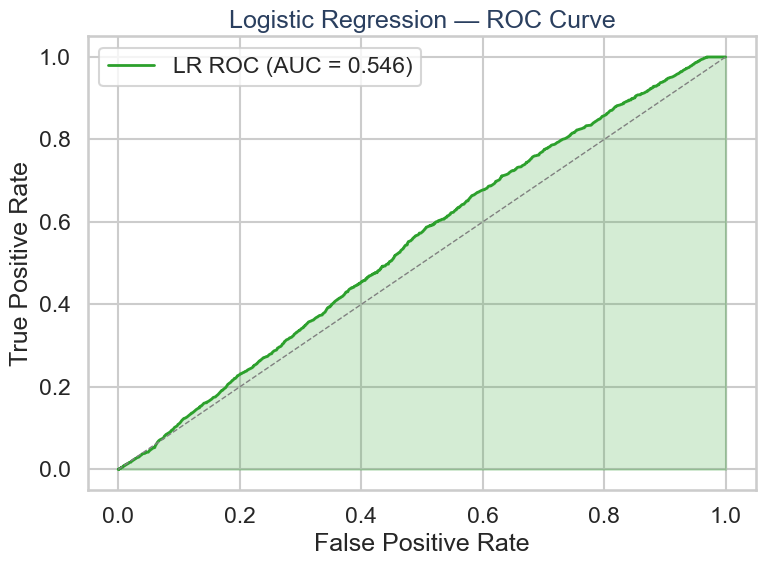

Random Forest — Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.60      0.71     10483
           1       0.17      0.44      0.24      1874

    accuracy                           0.58     12357
   macro avg       0.51      0.52      0.47     12357
weighted avg       0.75      0.58      0.64     12357



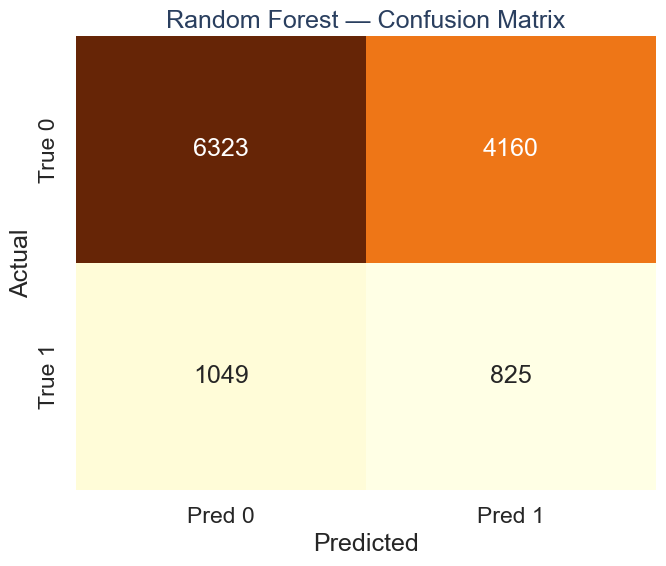

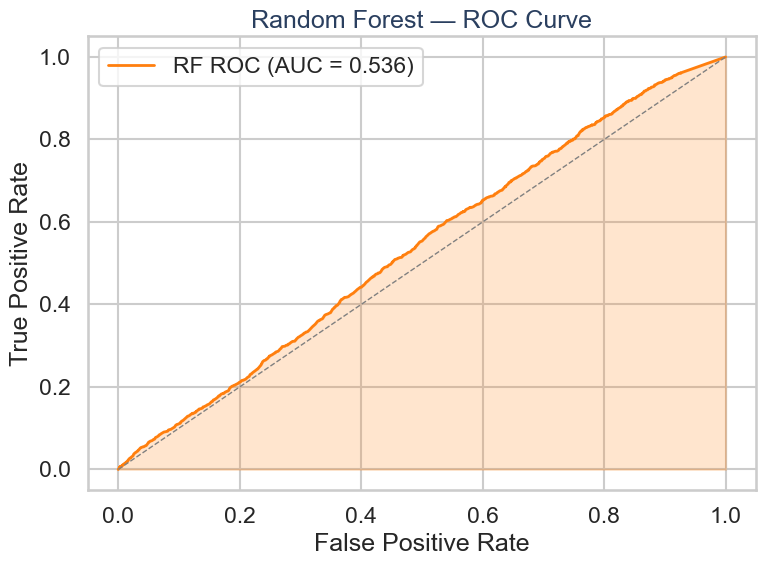

XGBoost — Classification Report (Test):
               precision    recall  f1-score   support

     Class 0       0.86      0.57      0.69     10483
     Class 1       0.17      0.48      0.25      1874

    accuracy                           0.56     12357
   macro avg       0.51      0.53      0.47     12357
weighted avg       0.76      0.56      0.62     12357



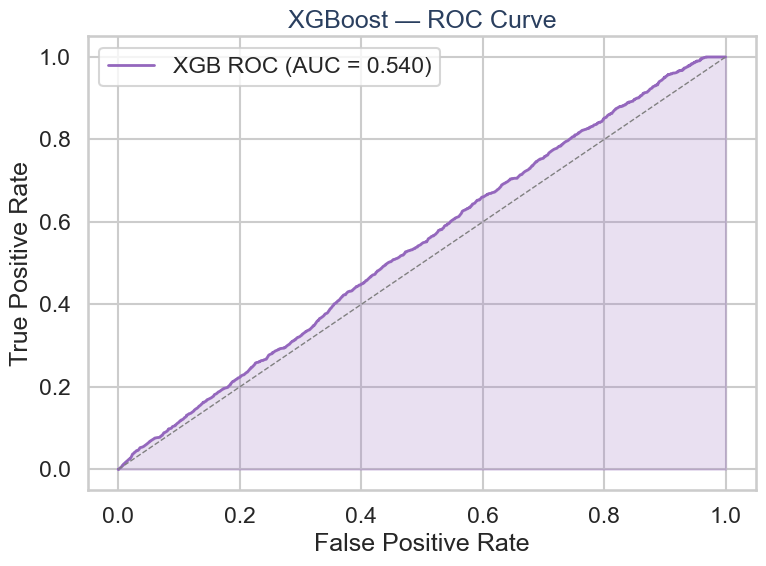

[WARN] VotingClassifier failed with: The estimator XGBClassifier should be a classifier.
[INFO] Falling back to manual soft voting (average of probabilities).
Manual Soft Voting — Classification Report (Test):
              precision    recall  f1-score   support

           0       0.86      0.61      0.71     10483
           1       0.17      0.43      0.24      1874

    accuracy                           0.58     12357
   macro avg       0.51      0.52      0.48     12357
weighted avg       0.75      0.58      0.64     12357



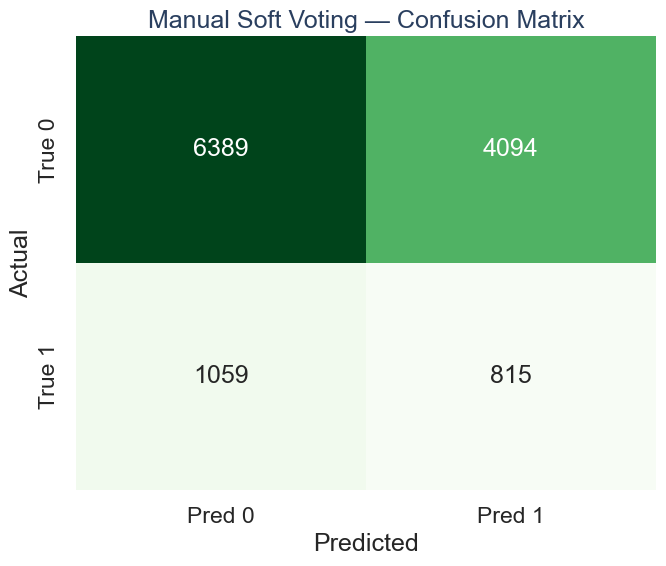

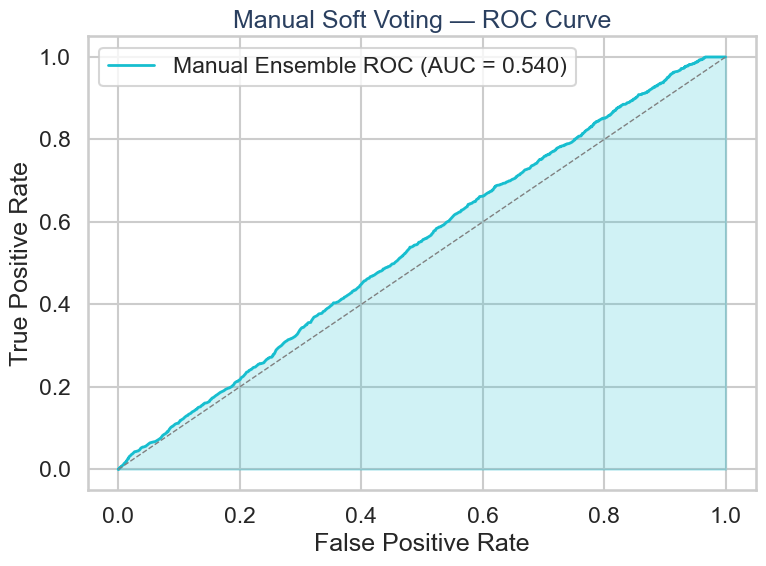

In [14]:
# =============================================================================
# Imports
# =============================================================================
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")  # Optional: keep logs clean

# Visualization style
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (8, 6)

# =============================================================================
# 1) Drop selected (one-hot) columns to simplify the feature space
# =============================================================================
drop_cols = [
    'default_unknown', 'default_yes',
    'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
    'job_retired', 'job_self-employed', 'job_services', 'job_student',
    'job_technician', 'job_unemployed', 'job_unknown'
]
df_slim = X_final.drop(columns=drop_cols)

# Split into features/target from the simplified set
X_full = df_slim.drop(columns=['loan_yes'])
y_full = df_slim['loan_yes'].astype(int)  # ensure 0/1 ints

# =============================================================================
# 2) Train/Test split
# =============================================================================
X_tr, X_te, y_tr, y_te = train_test_split(
    X_full, y_full, test_size=0.30, random_state=42, stratify=y_full
)

# =============================================================================
# 3) Class imbalance handling (SMOTE) — applied on the TRAIN partition only
# =============================================================================
smote = SMOTE(random_state=42)
X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

# =============================================================================
# 4) Standardize features (fit on TRAIN only, apply to both TRAIN/TEST)
# =============================================================================
scaler = StandardScaler()
X_tr_std = scaler.fit_transform(X_tr_res)  # fit on resampled training data
X_te_std = scaler.transform(X_te)

# =============================================================================
# 5) Benchmark a few models quickly (accuracy on resampled train vs. original test)
# =============================================================================
rows = []  # will collect [model_name, fit_seconds, train_acc, test_acc]

estimators = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()  # note: no predict_proba by default; only used in quick bench here
}

for name, clf in estimators.items():
    t0 = time.time()
    clf.fit(X_tr_std, y_tr_res)                 # fit using resampled/standardized TRAIN
    fit_secs = time.time() - t0

    y_hat_te = clf.predict(X_te_std)

    acc_tr = accuracy_score(y_tr_res, clf.predict(X_tr_std))  # train acc on resampled train
    acc_te = accuracy_score(y_te, y_hat_te)                   # test acc on original test

    rows.append([name, fit_secs, acc_tr, acc_te])

results_df = pd.DataFrame(rows, columns=["Model", "Train Time (s)", "Train Acc (resampled)", "Test Acc"])
print("Model comparison:")
print(results_df)

# --- New Plot: Horizontal bar chart for Test Acc ---
palette = sns.color_palette("viridis", n_colors=len(results_df))
ax = sns.barplot(
    data=results_df.sort_values("Test Acc", ascending=True),
    y="Model", x="Test Acc", palette=palette, edgecolor="black"
)
ax.bar_label(ax.containers[0], fmt="%.3f", padding=3)
plt.title("Model Comparison — Test Accuracy", color="#2a3f5f")
plt.xlabel("Accuracy")
plt.ylabel("")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# =============================================================================
# 6) KNN: Grid search over k/weights/distance (5-fold CV, accuracy)
# =============================================================================
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
print("Starting GridSearchCV for KNN...")
knn_cv = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
knn_cv.fit(X_tr_std, y_tr_res)

knn_best = knn_cv.best_estimator_
print("Best parameters for KNN:", knn_cv.best_params_)
print("Best cross-validation score for KNN:", knn_cv.best_score_)
print("Test accuracy for best KNN:", accuracy_score(y_te, knn_best.predict(X_te_std)))

# =============================================================================
# 7) Decision Tree: Grid search
# =============================================================================
tree_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
print("Starting GridSearchCV for Decision Tree...")
dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
dt_cv.fit(X_tr_std, y_tr_res)

dt_best = dt_cv.best_estimator_
print("Best parameters for Decision Tree:", dt_cv.best_params_)
print("Best cross-validation score for Decision Tree:", dt_cv.best_score_)
print("Test accuracy for best Decision Tree:", accuracy_score(y_te, dt_best.predict(X_te_std)))

# =============================================================================
# 8) Logistic Regression: Grid search
# =============================================================================
logreg_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}
print("Starting GridSearchCV for Logistic Regression...")
lr_cv = GridSearchCV(LogisticRegression(), logreg_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
lr_cv.fit(X_tr_std, y_tr_res)

lr_best = lr_cv.best_estimator_
print("Best parameters for Logistic Regression:", lr_cv.best_params_)
print("Best cross-validation score for Logistic Regression:", lr_cv.best_score_)
print("Test accuracy for best Logistic Regression:", accuracy_score(y_te, lr_best.predict(X_te_std)))

# =============================================================================
# 9) KNN: Confusion matrix for the best model (new style)
# =============================================================================
y_knn_te = knn_best.predict(X_te_std)
cm_knn = confusion_matrix(y_te, y_knn_te, labels=[0, 1])

plt.figure(figsize=(7, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="crest", cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('KNN (Best) — Confusion Matrix', color="#2a3f5f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# =============================================================================
# 10) KNN: Threshold tuning using predicted probabilities (new style)
# =============================================================================
y_knn_proba = knn_best.predict_proba(X_te_std)[:, 1]

def apply_threshold(prob_vec, thr):
    return [1 if p >= thr else 0 for p in prob_vec]  # FIXED: correct operator

thr_cmaps = ["mako", "rocket", "flare", "magma"]
for thr, cmap in zip([0.4, 0.5, 0.6, 0.7], thr_cmaps):
    y_adj = apply_threshold(y_knn_proba, thr)
    cm_adj = confusion_matrix(y_te, y_adj, labels=[0, 1])

    plt.figure(figsize=(7, 6))
    sns.heatmap(cm_adj, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'KNN — Confusion Matrix (threshold = {thr})', color="#2a3f5f")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    print(f"Classification Report for KNN (threshold = {thr}):\n",
          classification_report(y_te, y_adj))

# --- New Plot: ROC and PR for the best KNN ---
# ROC
fpr, tpr, _ = roc_curve(y_te, y_knn_proba)
auc_knn = roc_auc_score(y_te, y_knn_proba)

plt.figure()
plt.plot(fpr, tpr, color="#1f77b4", lw=2, label=f"ROC curve (AUC = {auc_knn:.3f})")
plt.fill_between(fpr, tpr, alpha=0.2, color="#1f77b4")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.title("KNN — ROC Curve", color="#2a3f5f")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# PR
prec, rec, _ = precision_recall_curve(y_te, y_knn_proba)
ap_knn = average_precision_score(y_te, y_knn_proba)

plt.figure()
plt.step(rec, prec, where='post', color="#d62728", lw=2, label=f"AP = {ap_knn:.3f}")
plt.fill_between(rec, prec, step='post', alpha=0.2, color="#d62728")
plt.title("KNN — Precision–Recall Curve", color="#2a3f5f")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# =============================================================================
# 11) KNN: (Optional) Refit best KNN on resampled *scaled* training data
# =============================================================================
knn_best_refit = KNeighborsClassifier(**knn_cv.best_params_)
knn_best_refit.fit(X_tr_std, y_tr_res)
y_knn_refit = knn_best_refit.predict(X_te_std)
print("Classification Report for KNN (best, refit on resampled train):\n",
      classification_report(y_te, y_knn_refit))

# =============================================================================
# 12) KNN: SMOTE after scaling (kept for parity; not generally recommended)
# =============================================================================
smote2 = SMOTE(random_state=42)
X_tr_std_res, y_tr_std_res = smote2.fit_resample(X_tr_std, y_tr_res)

knn_best_rescaled = KNeighborsClassifier(**knn_cv.best_params_)
knn_best_rescaled.fit(X_tr_std_res, y_tr_std_res)
y_knn_rescaled = knn_best_rescaled.predict(X_te_std)

print("Classification Report for KNN after resampling the standardized space:\n",
      classification_report(y_te, y_knn_rescaled))

# =============================================================================
# 13) Logistic Regression (standalone): fit on resampled+standardized train; evaluate
# =============================================================================
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_tr_std, y_tr_res)

y_lr_te = logreg.predict(X_te_std)
y_lr_proba = logreg.predict_proba(X_te_std)[:, 1]

print("Logistic Regression — Classification Report (Test):")
print(classification_report(y_te, y_lr_te))
print("Logistic Regression — Confusion Matrix (Test):")
lr_cm = confusion_matrix(y_te, y_lr_te, labels=[0, 1])

plt.figure(figsize=(7, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap="PuBuGn", cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Logistic Regression — Confusion Matrix', color="#2a3f5f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("Logistic Regression — AUC-ROC (Test):")
print(roc_auc_score(y_te, y_lr_proba))

# ROC for LR (new)
fpr_lr, tpr_lr, _ = roc_curve(y_te, y_lr_proba)
auc_lr = roc_auc_score(y_te, y_lr_proba)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color="#2ca02c", lw=2, label=f"LR ROC (AUC = {auc_lr:.3f})")
plt.fill_between(fpr_lr, tpr_lr, alpha=0.2, color="#2ca02c")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.title("Logistic Regression — ROC Curve", color="#2a3f5f")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 14) Random Forest (with SMOTE on standardized train to mirror original)
# =============================================================================
smote_rf = SMOTE(random_state=42)
X_tr_std_rf, y_tr_rf = smote_rf.fit_resample(X_tr_std, y_tr_res)

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_clf.fit(X_tr_std_rf, y_tr_rf)
y_rf_te = rf_clf.predict(X_te_std)
rf_proba = rf_clf.predict_proba(X_te_std)[:, 1]

print("Random Forest — Classification Report (Test):\n",
      classification_report(y_te, y_rf_te))

cm_rf = confusion_matrix(y_te, y_rf_te, labels=[0, 1])
plt.figure(figsize=(7, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="YlOrBr", cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Random Forest — Confusion Matrix', color="#2a3f5f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC for RF (new)
fpr_rf, tpr_rf, _ = roc_curve(y_te, rf_proba)
auc_rf = roc_auc_score(y_te, rf_proba)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color="#ff7f0e", lw=2, label=f"RF ROC (AUC = {auc_rf:.3f})")
plt.fill_between(fpr_rf, tpr_rf, alpha=0.2, color="#ff7f0e")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.title("Random Forest — ROC Curve", color="#2a3f5f")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 15) XGBoost: handle imbalance via scale_pos_weight; fit/evaluate
# =============================================================================
pos = (y_tr_res == 1).sum()
neg = (y_tr_res == 0).sum()
scale_pos_weight = neg / max(pos, 1)  # guard against divide-by-zero

# Configure XGB to be sklearn-friendly for proba-based meta-estimators
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    n_jobs=-1
)
xgb_clf.fit(X_tr_std, y_tr_res)
y_xgb_te = xgb_clf.predict(X_te_std)
xgb_proba = xgb_clf.predict_proba(X_te_std)[:, 1]

print("XGBoost — Classification Report (Test):\n",
      classification_report(y_te, y_xgb_te, target_names=['Class 0', 'Class 1']))

# ROC for XGB (new)
fpr_xgb, tpr_xgb, _ = roc_curve(y_te, xgb_proba)
auc_xgb = roc_auc_score(y_te, xgb_proba)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color="#9467bd", lw=2, label=f"XGB ROC (AUC = {auc_xgb:.3f})")
plt.fill_between(fpr_xgb, tpr_xgb, alpha=0.2, color="#9467bd")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
plt.title("XGBoost — ROC Curve", color="#2a3f5f")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 16) Soft Voting Ensemble (RF + XGB) on the same resampled/standardized train
# =============================================================================
rf_ens = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

xgb_ens = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    n_estimators=300,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    n_jobs=-1
)

# Primary path: VotingClassifier with soft voting
try:
    voter = VotingClassifier(
        estimators=[('rf', rf_ens), ('xgb', xgb_ens)],
        voting='soft',
        n_jobs=-1
    )
    voter.fit(X_tr_std, y_tr_res)

    y_vote = voter.predict(X_te_std)
    y_vote_proba = voter.predict_proba(X_te_std)[:, 1]

    print("Voting Ensemble — Classification Report (Test):")
    print(classification_report(y_te, y_vote))

    # Confusion matrix for Ensemble (new style)
    cm_vote = confusion_matrix(y_te, y_vote, labels=[0, 1])
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm_vote, annot=True, fmt='d', cmap="Greens", cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title('Voting Ensemble — Confusion Matrix', color="#2a3f5f")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # ROC for Ensemble
    fpr_v, tpr_v, _ = roc_curve(y_te, y_vote_proba)
    auc_v = roc_auc_score(y_te, y_vote_proba)
    plt.figure()
    plt.plot(fpr_v, tpr_v, color="#17becf", lw=2, label=f"Ensemble ROC (AUC = {auc_v:.3f})")
    plt.fill_between(fpr_v, tpr_v, alpha=0.2, color="#17becf")
    plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
    plt.title("Voting Ensemble — ROC Curve", color="#2a3f5f")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    # Fallback path: manual soft voting (robust to any env/version issues)
    print(f"[WARN] VotingClassifier failed with: {e}")
    print("[INFO] Falling back to manual soft voting (average of probabilities).")

    # Fit base models separately
    rf_ens.fit(X_tr_std, y_tr_res)
    xgb_ens.fit(X_tr_std, y_tr_res)

    # Average their probabilities
    rf_proba = rf_ens.predict_proba(X_te_std)[:, 1]
    xgb_proba = xgb_ens.predict_proba(X_te_std)[:, 1]
    y_vote_proba = (rf_proba + xgb_proba) / 2.0
    y_vote = (y_vote_proba >= 0.5).astype(int)  # FIXED: correct operator

    print("Manual Soft Voting — Classification Report (Test):")
    print(classification_report(y_te, y_vote))

    cm_vote = confusion_matrix(y_te, y_vote, labels=[0, 1])
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm_vote, annot=True, fmt='d', cmap="Greens", cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title('Manual Soft Voting — Confusion Matrix', color="#2a3f5f")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # ROC for manual ensemble
    fpr_v, tpr_v, _ = roc_curve(y_te, y_vote_proba)
    auc_v = roc_auc_score(y_te, y_vote_proba)
    plt.figure()
    plt.plot(fpr_v, tpr_v, color="#17becf", lw=2, label=f"Manual Ensemble ROC (AUC = {auc_v:.3f})")
    plt.fill_between(fpr_v, tpr_v, alpha=0.2, color="#17becf")
    plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
    plt.title("Manual Soft Voting — ROC Curve", color="#2a3f5f")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()
# =============================================================================

## Conclusions
In this practical application assignment, we set out to predict whether individuals would accept a loan offer after being contacted through a marketing campaign, using a dataset derived from Portuguese banking records. One of the primary challenges was the significant class imbalance in the data—only about 11% of observations represented positive loan acceptance.
To address this imbalance and improve predictive performance, we explored a variety of machine learning strategies. These included class‑weight adjustments, the application of the Synthetic Minority Over‑sampling Technique (SMOTE), dimensionality reduction using Principal Component Analysis (PCA), and experimentation with several algorithms such as Random Forest, Gradient Boosting, Support Vector Machines, Decision Trees, and Logistic Regression. We also tested ensemble approaches, including stacking and voting, to combine the strengths of multiple models.
Despite these efforts, model performance remained consistently weak. Most classifiers produced AUC‑ROC scores only marginally above random chance, suggesting that the available features did not contain strong signals for predicting loan acceptance. This pattern indicated a fundamental limitation in the dataset itself rather than in the modeling techniques applied.
As the analysis progressed, we shifted attention to a single feature: call duration. Prior studies have highlighted its strong correlation with loan acceptance, and our findings reinforced this connection. Using call duration alone yielded noticeably better predictive performance than the full multivariate models. However, because call duration is only known after a call has taken place, it offers limited value for ad‑tech or marketing scenarios that require identifying likely customers before outreach occurs.
Ultimately, the investigation highlights a critical gap: the dataset lacks meaningful early‑stage indicators capable of identifying high‑potential customers in advance. For industries focused on targeted advertising and proactive engagement, this limitation underscores the need for richer feature collection or further research to uncover variables that can reliably predict loan acceptance prior to customer contact.

Given the extensive exploration of machine learning classifiers and techniques, we propose the following refined next steps for the client (the bank):
First, it will be essential to collaborate closely with banking domain experts to gain deeper insight into the factors influencing loan acceptance. Their expertise can help surface relevant behavioral, financial, and contextual variables that are not currently represented in the dataset. This collaboration may also guide the engineering of new features—such as additional financial indicators, customer engagement metrics, or historical interaction data—that better capture the characteristics of individuals likely to accept a loan.
Second, the bank should consider expanding and diversifying its dataset. A larger and more varied collection of customer profiles, behaviors, and campaign interactions may reveal patterns that are not visible in the current dataset. Broader data coverage can also improve generalization and increase the likelihood of uncovering predictive signals that enhance model performance.
Third, while traditional machine learning methods were explored comprehensively, it may be beneficial to investigate more advanced modeling approaches, including deep learning. Neural networks—particularly deep architectures—are capable of identifying complex, nonlinear relationships within high‑dimensional data and may discover latent patterns that simpler models fail to capture.
In parallel, the bank must ensure that interpretability remains a priority, particularly given the regulatory and ethical constraints of the financial sector. Techniques such as SHAP (SHapley Additive exPlanations), partial dependence plots, and feature‑importance analyses can provide transparency into model behavior and highlight the primary factors influencing loan acceptance. This interpretability is crucial for informed decision‑making and for maintaining trust with both regulators and customers.
Finally, we recommend establishing a robust monitoring and feedback system to evaluate model performance in real time. Continually assessing the effectiveness of marketing campaigns, gathering customer feedback, and analyzing performance drift will allow the bank to refine its strategies and improve campaign targeting iteratively. This ongoing cycle of monitoring, learning, and adjustment is essential for ensuring long‑term success.
In summary, although extensive experimentation revealed that the existing dataset provides limited predictive capability for loan acquisition, the bank can move toward more effective targeting by collaborating with domain experts, expanding data collection, exploring neural network–based approaches, prioritizing model interpretability, and implementing continuous performance monitoring. Collectively, these steps will position the bank to develop more precise and impactful advertising and customer‑acquisition strategies.

##### Questions